In [1]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import tikzplotlib

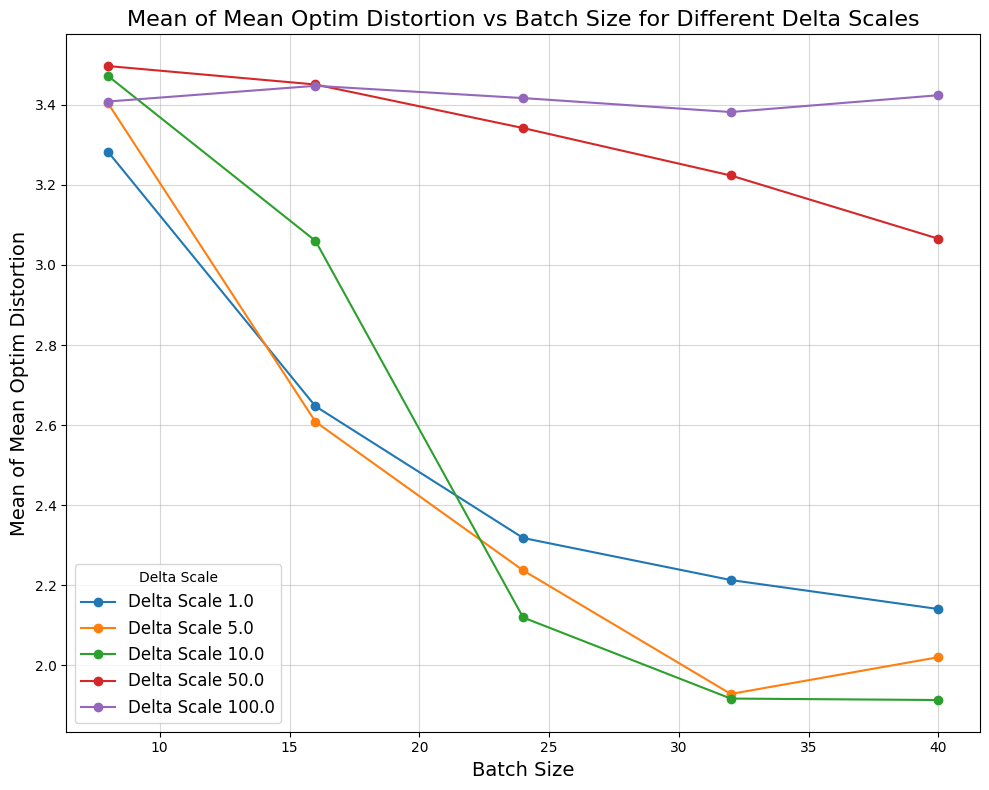

In [7]:
base_dir = '/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/expes/results_expes/sensibility_analysis/batch_size/'

results_dict = defaultdict(lambda: defaultdict(list))

for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(subfolder_path, file)
                
                df = pd.read_csv(file_path)
                
                df.columns = df.columns.str.strip().str.lower()
                
                if 'scale_delta' not in df.columns or 'batch_size' not in df.columns or 'mean_optim_distortion' not in df.columns:
                    print(f"Warning: Missing required columns in {file_path}. Skipping this file.")
                    continue
                
                for _, row in df.iterrows():
                    delta_scale = row['scale_delta']
                    batch_size = row['batch_size']
                    mean_optim_distortion = row['mean_optim_distortion']
                    
                    results_dict[delta_scale][batch_size].append(mean_optim_distortion)

mean_results = {delta_scale: {batch_size: sum(distortions) / len(distortions) 
                              for batch_size, distortions in batch_dict.items()} 
                for delta_scale, batch_dict in results_dict.items()}

plt.figure(figsize=(10, 8))

for delta_scale, batch_dict in mean_results.items():
    batch_sizes = sorted(batch_dict.keys())
    mean_distortions = [batch_dict[batch_size] for batch_size in batch_sizes]
    plt.plot(batch_sizes, mean_distortions, marker='o', label=f'Delta Scale {delta_scale}')

# Add labels, legend, and title
plt.xlabel('Batch Size', fontsize=14)
plt.ylabel('Mean of Mean Optim Distortion', fontsize=14)
plt.title('Mean of Mean Optim Distortion vs Batch Size for Different Delta Scales', fontsize=16)
plt.legend(title='Delta Scale', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

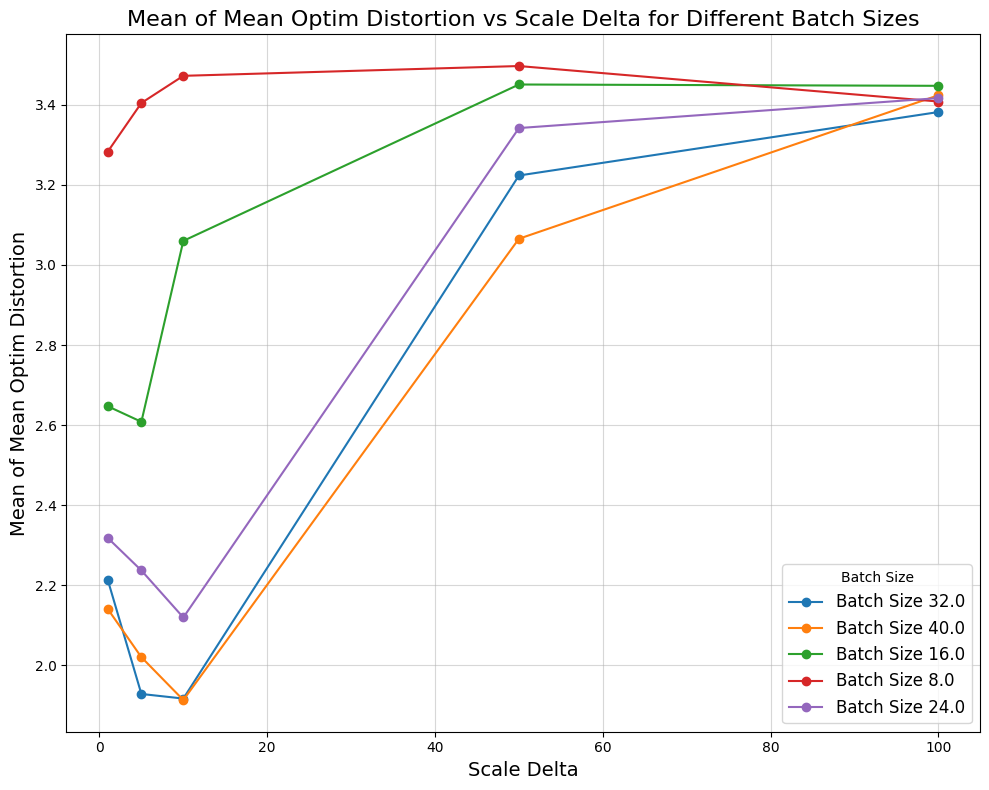

In [8]:
base_dir = '/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/expes/results_expes/sensibility_analysis/batch_size/'


results_dict = defaultdict(lambda: defaultdict(list))

# Read and organize data
for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(subfolder_path, file)
                
                df = pd.read_csv(file_path)
                df.columns = df.columns.str.strip().str.lower()
                
                if 'scale_delta' not in df.columns or 'batch_size' not in df.columns or 'mean_optim_distortion' not in df.columns:
                    print(f"Warning: Missing required columns in {file_path}. Skipping this file.")
                    continue
                
                for _, row in df.iterrows():
                    delta_scale = row['scale_delta']
                    batch_size = row['batch_size']
                    mean_optim_distortion = row['mean_optim_distortion']
                    results_dict[delta_scale][batch_size].append(mean_optim_distortion)

# Compute mean distortions grouped by batch size instead of delta_scale
mean_results_by_batch = defaultdict(dict)

for delta_scale, batch_dict in results_dict.items():
    for batch_size, distortions in batch_dict.items():
        mean = sum(distortions) / len(distortions)
        mean_results_by_batch[batch_size][delta_scale] = mean

# Plot
plt.figure(figsize=(10, 8))

for batch_size, delta_dict in mean_results_by_batch.items():
    delta_scales = sorted(delta_dict.keys())
    mean_distortions = [delta_dict[delta] for delta in delta_scales]
    plt.plot(delta_scales, mean_distortions, marker='o', label=f'Batch Size {batch_size}')

plt.xlabel('Scale Delta', fontsize=14)
plt.ylabel('Mean of Mean Optim Distortion', fontsize=14)
plt.title('Mean of Mean Optim Distortion vs Scale Delta for Different Batch Sizes', fontsize=16)
plt.legend(title='Batch Size', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()